Lisa Ho Yen Xin 20297507

# [1] Import Functions

## [1.1] Google Colab

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%run /content/drive/MyDrive/FYP/ImportFunctions.ipynb

## [1.2] Jupyter

In [1]:
%run ImportFunctions.ipynb

2024-04-02 17:36:54.186885: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-02 17:36:55.905790: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-04-02 17:36:55.905825: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2024-04-02 17:37:01.052965: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2024-

# [2] Import Libraries

In [2]:
import cv2
import numpy as np
import seaborn as sns
from keras.utils import plot_model
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    precision_recall_fscore_support,
)
from sklearn.model_selection import train_test_split
from tabulate import tabulate
import tensorflow as tf

# [3] Load Dataset

## [3.1] Google Colab

In [4]:
# Load images and labels
images = np.load('/content/drive/My Drive/FYP/dataset/images460.npy')
labels = np.load('/content/drive/My Drive/FYP/dataset/labels460.npy')

## [3.2] Jupyter

In [3]:
# Load images and labels
images = np.load('dataset/images460.npy')
labels = np.load('dataset/labels460.npy')

# [4] Prepare Dataset

In [4]:
images = resize_images(images, (299,299))

In [5]:
# Display array shapes
display_array_shapes(images, labels)

+--------------+--------------------+
| Array Name   | Shape              |
+==============+====================+
| Images       | (460, 299, 299, 3) |
+--------------+--------------------+
| Labels       | (460,)             |
+--------------+--------------------+


In [6]:
# Get the number of unique labels
num_classes = len(np.unique(labels))

print("Number of unique labels:", num_classes)

Number of unique labels: 9


In [7]:
# Binarize labels
labels_binarized = binarize_labels(labels)

# [5] Train Model

In [8]:
# Split the data into training and validation sets
X_train, X_temp, y_train, y_temp = train_test_split(images, labels_binarized, test_size=0.2, random_state=42)

# Further split the temporary data into validation and testing sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Train shape:", X_train.shape, y_train.shape)
print("Validation shape:", X_val.shape, y_val.shape)
print("Test shape:", X_test.shape, y_test.shape)

Train shape: (368, 299, 299, 3) (368, 9)
Validation shape: (46, 299, 299, 3) (46, 9)
Test shape: (46, 299, 299, 3) (46, 9)


In [9]:
# Build and compile InceptionV3 model
inceptionv3_model = build_and_compile_inceptionv3_model(num_classes)

2024-04-02 17:37:47.468768: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:267] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2024-04-02 17:37:47.475572: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (LSPMHPCHN01): /proc/driver/nvidia/version does not exist
2024-04-02 17:37:47.483937: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
# Train the model
inceptionv3_history = inceptionv3_model.fit(X_train, y_train, batch_size=42, validation_data=(X_val, y_val), epochs=10)

# Evaluate the model on the validation data
inceptionv3_loss, inceptionv3_accuracy = inceptionv3_model.evaluate(X_val, y_val)

2024-04-02 17:37:55.370992: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 394794816 exceeds 10% of free system memory.


Epoch 1/10


2024-04-02 17:38:03.728350: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 232339968 exceeds 10% of free system memory.


1/9 [==>...........................] - ETA: 1:12 - loss: 2.9256 - accuracy: 0.0476

2024-04-02 17:38:06.519757: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 232339968 exceeds 10% of free system memory.


2/9 [=====>........................] - ETA: 11s - loss: 13.1638 - accuracy: 0.2143

2024-04-02 17:38:07.874463: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 232339968 exceeds 10% of free system memory.


3/9 [=========>....................] - ETA: 9s - loss: 16.1105 - accuracy: 0.2381 

2024-04-02 17:38:09.213477: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 232339968 exceeds 10% of free system memory.


9/9 [==============================] - 26s 2s/step - loss: 21.3473 - accuracy: 0.3315 - val_loss: 22.8851 - val_accuracy: 0.3478
Epoch 2/10
9/9 [==============================] - 15s 2s/step - loss: 8.8906 - accuracy: 0.5815 - val_loss: 16.2766 - val_accuracy: 0.5000
Epoch 3/10
9/9 [==============================] - 13s 1s/step - loss: 3.2095 - accuracy: 0.7908 - val_loss: 11.1199 - val_accuracy: 0.5217
Epoch 4/10
9/9 [==============================] - 12s 1s/step - loss: 0.8023 - accuracy: 0.8832 - val_loss: 11.4310 - val_accuracy: 0.5870
Epoch 5/10
9/9 [==============================] - 12s 1s/step - loss: 0.1807 - accuracy: 0.9701 - val_loss: 15.2668 - val_accuracy: 0.5435
Epoch 6/10
9/9 [==============================] - 11s 1s/step - loss: 0.1057 - accuracy: 0.9810 - val_loss: 15.2376 - val_accuracy: 0.5000
Epoch 7/10
9/9 [==============================] - 11s 1s/step - loss: 0.0114 - accuracy: 0.9973 - val_loss: 13.2036 - val_accuracy: 0.4783
Epoch 8/10
9/9 [=====================

In [11]:
# Calculate average loss and accuracy
average_loss = sum(inceptionv3_history.history['val_loss']) / len(inceptionv3_history.history['val_loss'])
average_accuracy = sum(inceptionv3_history.history['val_accuracy']) / len(inceptionv3_history.history['val_accuracy'])

print(f"Average Validation Loss: {average_loss}, Average Validation Accuracy: {average_accuracy}")

Average Validation Loss: 14.469318771362305, Average Validation Accuracy: 0.48478260934352874


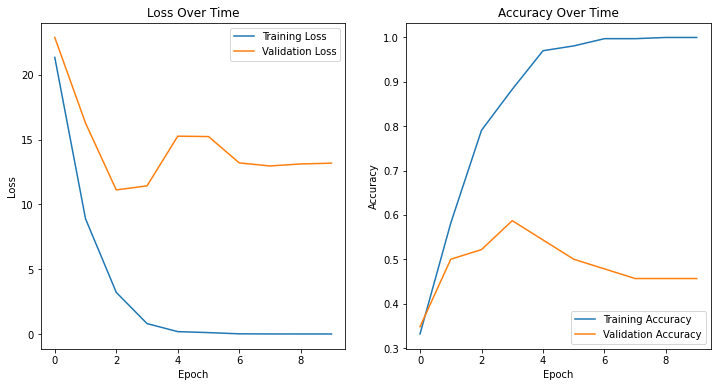

In [12]:
plot_training_history(inceptionv3_history)

# [6] Save Model

## [6.1] Google Colab

In [14]:
# Save model
inceptionv3_model.save('/content/drive/MyDrive/FYP/models/InceptionV3_ori')

## [6.2] Jupyter

In [13]:
# Save model
inceptionv3_model.save('models/InceptionV3_ori')

INFO:tensorflow:Assets written to: models/InceptionV3_ori/assets


INFO:tensorflow:Assets written to: models/InceptionV3_ori/assets


# [6] Load Model

## [6.1] Google Colab

In [15]:
# Load the saved model
loaded_inceptionv3_model = tf.keras.models.load_model('/content/drive/MyDrive/FYP/models/InceptionV3_ori')

## [6.2] Jupyter

In [14]:
# Load the saved model
loaded_inceptionv3_model = tf.keras.models.load_model('models/InceptionV3_ori')

# [7] Test and Analyse

In [15]:
# Evaluate the model on the test data
inceptionv3_test_loss, inceptionv3_test_accuracy = loaded_inceptionv3_model.evaluate(X_test, y_test)
print(f"Test Loss: {inceptionv3_test_loss}, Test Accuracy: {inceptionv3_test_accuracy}")

2/2 [==============================] - 5s 480ms/step - loss: 9.8757 - accuracy: 0.4130
Test Loss: 9.87570571899414, Test Accuracy: 0.41304346919059753


In [16]:
inceptionv3_predicted_labels, inceptionv3_true_labels_list = make_predictions_and_evaluate(loaded_inceptionv3_model, X_test, y_test)

2/2 [==============================] - 3s 470ms/step


In [17]:
calculate_classification_metrics(inceptionv3_true_labels_list, inceptionv3_predicted_labels)

Accuracy: 0.4130
Precision: 0.1491
Recall: 0.1736
F1 Score: 0.1604


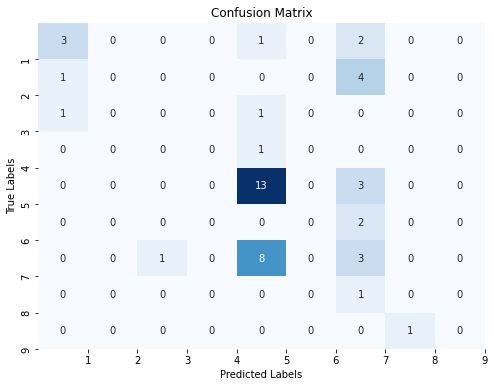

In [18]:
display_confusion_matrix(inceptionv3_true_labels_list, inceptionv3_predicted_labels)